In [1]:
import zarr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the zarr root (can load a .zip file using zarr.open())
fpath = "data/blue-mtn-unit.zip"
zarr_root = zarr.open(fpath)

# NOTE: you can READ a zarr array as a binary .zip file, but you cannot WRITE.
# in order to write you need to extract to a directory store.
# The following code would load a zarr group as a directory store
# fpath = "data/blue_mtn_unit/"
# zarr_root = zarr.open(fpath)

In [3]:
# View zarr array attributes
zarr_root.attrs.keys()

dict_keys(['dx', 'dy', 'dz', 'nx', 'ny', 'nz', 'pad', 'sparse_array', 'xmax', 'xmin', 'ymax', 'ymin'])

In [12]:
# Pull relevant data from the zarr attributes
nx, ny, nz = zarr_root.attrs["nx"], zarr_root.attrs["ny"], zarr_root.attrs["nz"]
dx, dy, dz = zarr_root.attrs["dx"], zarr_root.attrs["dy"], zarr_root.attrs["dz"]

In [5]:
# Examine the available arrays
zarr_tree = zarr_root.tree()
print(zarr_tree)

/
 ├── canopy
 │   ├── SAV (797, 638, 62) float32
 │   ├── bulk-density (797, 638, 62) float32
 │   └── species-code (797, 638, 62) uint16
 └── surface
     ├── DEM (797, 638) float32
     ├── FMC (797, 638) float32
     ├── SAV (797, 638) float32
     ├── bulk-density (797, 638) float32
     ├── fuel-depth (797, 638) float32
     └── fuel-model-sb40 (797, 638) uint8


In [6]:
# Look at the canopy group
canopy = zarr_root["canopy"]

In [7]:
# Load the canopy bulk-density array into memory
bulk_density = canopy["bulk-density"][...]

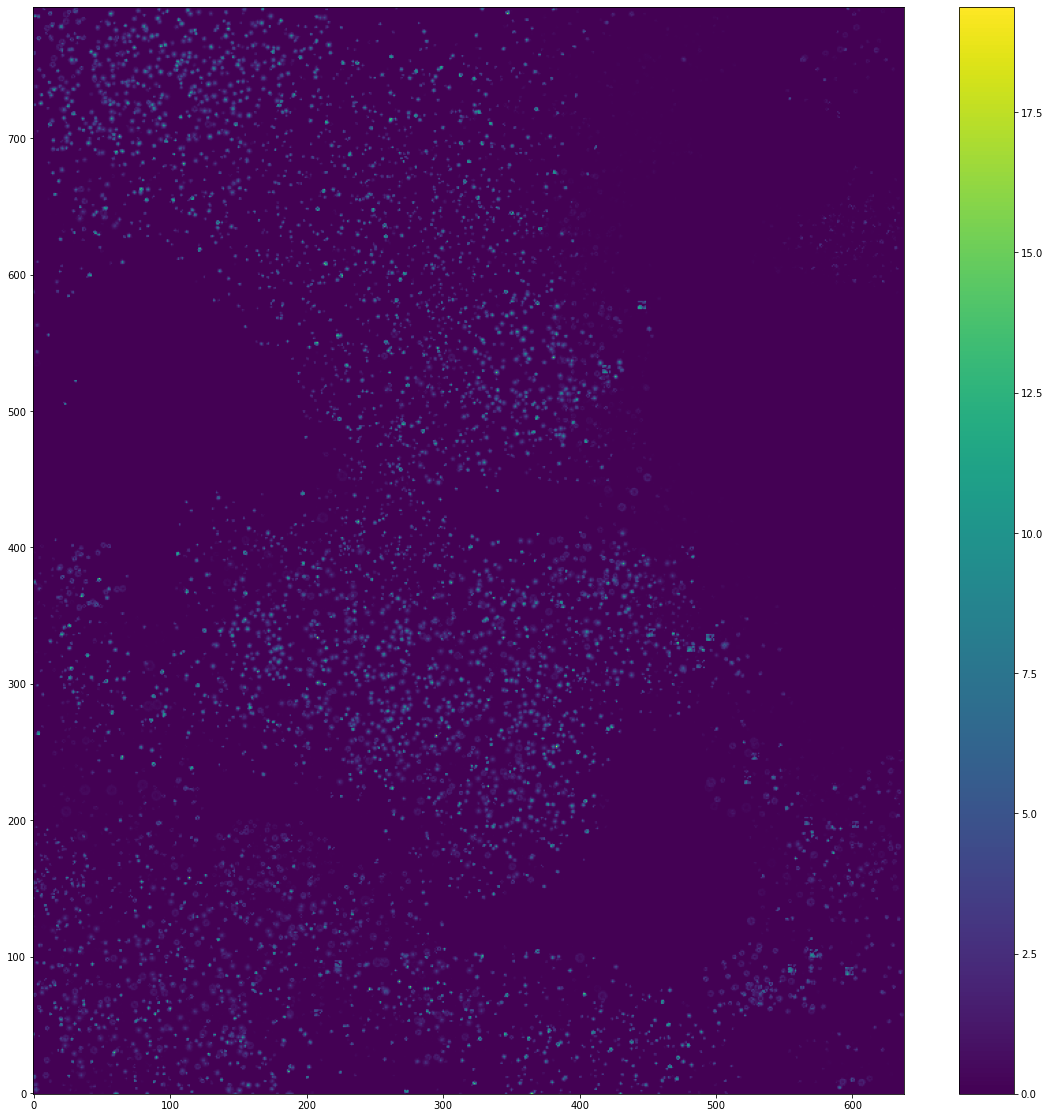

In [18]:
# Plot the bulk_density array as a 2D image in the XY plane summed along the vertical axis
fig, ax = plt.subplots(figsize=(20, 20))
img = plt.imshow(bulk_density.sum(axis=2), origin="lower", cmap="viridis")
plt.colorbar()
plt.show()

# Compute a 2D canopy height model array from the 3D canopy bulk density array

In [13]:
# Initialize an empty array with shape ny, nx
canopy_height_model = np.zeros((ny, nx))

# Iterate over the z-levels of the array
for k in range(nz):
    vertical_slice = bulk_density[:, :, k]                                  # Slice the XY plane at index k
    contains_canopy = np.where(vertical_slice > 0, k, 0)                    # Assign a value k where the bulk_density > 0
    canopy_height_model = np.maximum(contains_canopy, canopy_height_model)  # Assign new canopy height values

# Convert array index to meters
canopy_height_model = canopy_height_model * dz + (dz / 2)

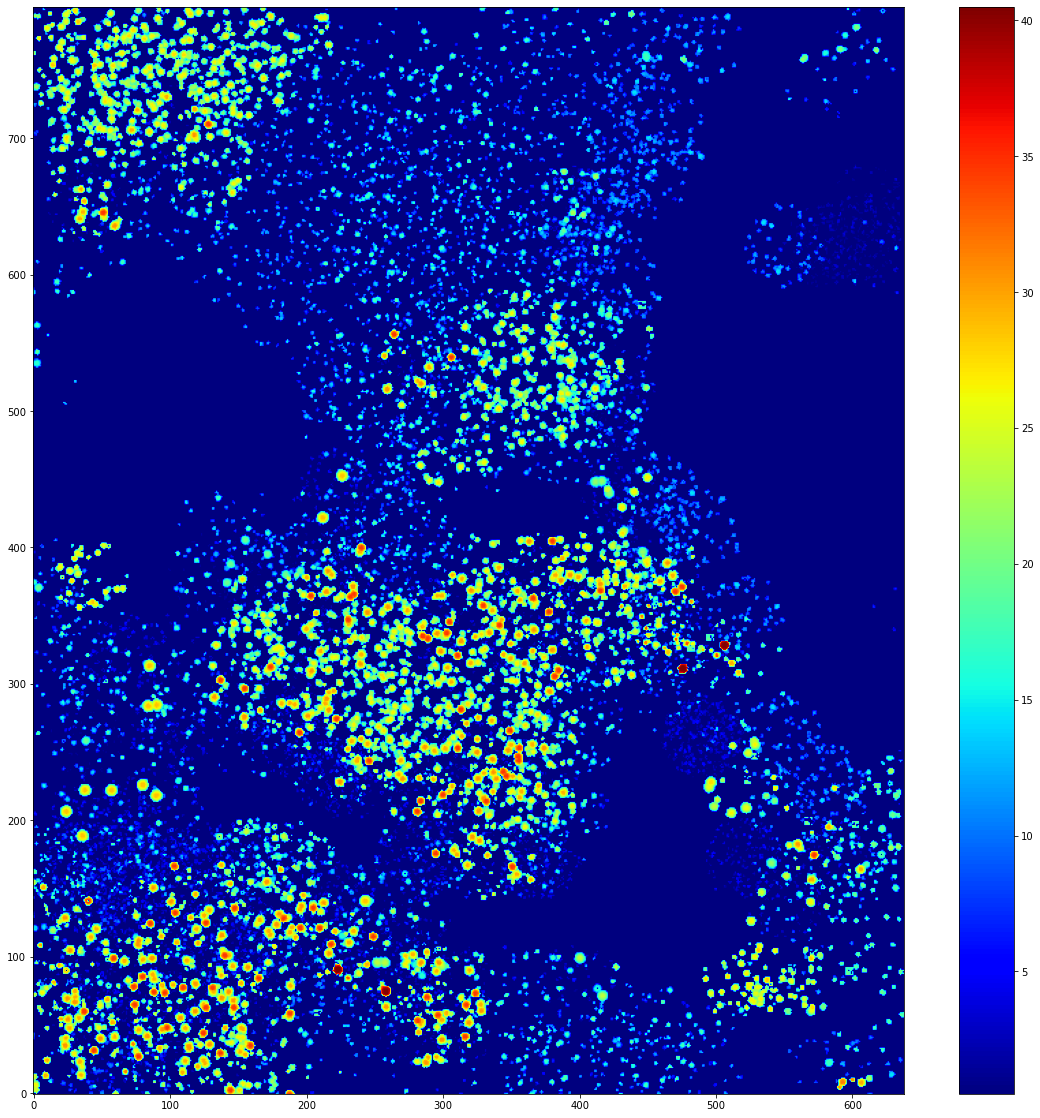

In [16]:
# Plot the canopy height model
fig, ax = plt.subplots(figsize=(20, 20))
img = plt.imshow(canopy_height_model, origin="lower", cmap="jet")
plt.colorbar()
plt.show()